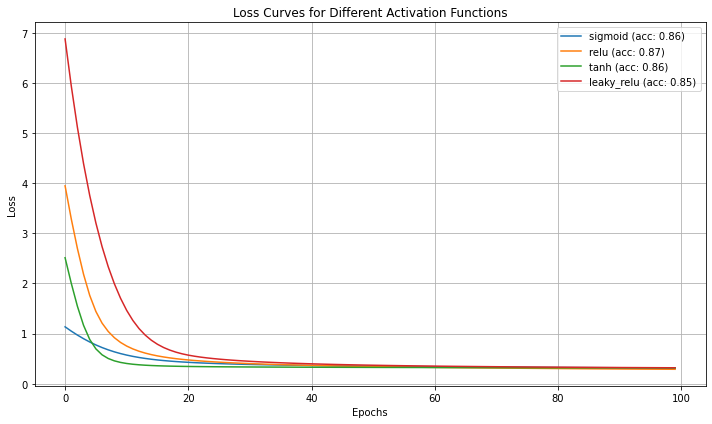

sigmoid: Accuracy = 0.865
relu: Accuracy = 0.870
tanh: Accuracy = 0.860
leaky_relu: Accuracy = 0.855


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate toy dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Activation functions and derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2

def leaky_relu(x): return np.where(x > 0, x, 0.01 * x)
def leaky_relu_deriv(x): return np.where(x > 0, 1, 0.01)

# Simple Neural Network
class SimpleNN:
    def __init__(self, activation='relu'):
        self.input_size = 2
        self.hidden_size = 10
        self.output_size = 1
        self.lr = 0.1
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        self.set_activation(activation)

    def set_activation(self, name):
        if name == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_deriv
        elif name == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        elif name == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif name == 'leaky_relu':
            self.activation = leaky_relu
            self.activation_deriv = leaky_relu_deriv
        else:
            raise ValueError("Unsupported activation function.")

    def train(self, X, y, epochs=100):
        self.loss_history = []
        for _ in range(epochs):
            # Forward
            Z1 = X @ self.W1 + self.b1
            A1 = self.activation(Z1)
            Z2 = A1 @ self.W2 + self.b2
            A2 = sigmoid(Z2)  # final layer always sigmoid for binary

            # Loss
            loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))
            self.loss_history.append(loss)

            # Backward
            dZ2 = A2 - y
            dW2 = A1.T @ dZ2 / len(X)
            db2 = np.mean(dZ2, axis=0, keepdims=True)

            dA1 = dZ2 @ self.W2.T
            dZ1 = dA1 * self.activation_deriv(Z1)
            dW1 = X.T @ dZ1 / len(X)
            db1 = np.mean(dZ1, axis=0, keepdims=True)

            # Update weights
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1

    def predict(self, X):
        A1 = self.activation(X @ self.W1 + self.b1)
        A2 = sigmoid(A1 @ self.W2 + self.b2)
        return (A2 > 0.5).astype(int)

# Evaluate each activation function
activations = ['sigmoid', 'relu', 'tanh', 'leaky_relu']
results = {}

for act in activations:
    model = SimpleNN(activation=act)
    model.train(X_train, y_train, epochs=100)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[act] = {
        'model': model,
        'accuracy': acc,
        'loss_history': model.loss_history
    }

# Plot loss history
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(results[act]['loss_history'], label=f"{act} (acc: {results[act]['accuracy']:.2f})")
plt.title("Loss Curves for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary
for act in activations:
    print(f"{act}: Accuracy = {results[act]['accuracy']:.3f}")
